Alexander Bae<br>
DATA 71200: Advanced Data Analysis<br>
Prof. Johanna Devaney<br>
2021-06-12<br>

<b>Dataset</b>: [UCI Machine Learning Repository Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [1]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn as mgl
import numpy as np
from sklearn.model_selection import train_test_split as split
%matplotlib inline


# Obtain load the dataset from the UCI Repository archives
uci_link = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# UCI dataset does not automatically provide headers; manually provide a list of headers for data
abalone_colnames = ['sex', 'shell_length', 'diameter', 'height', 'total_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'] 

# create dataframe using the link data, and the list of column names
abalone_df = pd.read_csv(uci_link, names = abalone_colnames)

In [4]:
# check data types and column names of the data frame
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   shell_length    4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   total_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
# check summary statistics of each feature in the data frame
abalone_df.describe()

,shell_length,diameter,height,total_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<h1>Data Cleaning and Preparation</h1>

<h3>Unique/Distinct, Null, and NA values</h3>

In [194]:
# use the .isnull() and .sum() functions to assess whether any columns have a null value that need to be addressed
# since no values are null, no imputation or dropping of rows need to be done
abalone_df.isnull().sum()

sex                      0
shell_length             0
diameter                 0
height                   0
total_weight             0
shucked_weight           0
viscera_weight           0
shell_weight             0
rings                    0
sex_F                    0
sex_M                    0
scaled_shell_length    909
scaled_total_weight    909
dtype: int64

In [117]:
abalone_df['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

None of the columns require any dropping of duplicated values, and all values in the 'sex' column are uniform per distinct value.  However, there are still a few more steps that need to be taken for cleaning and preparation.


There are two forms of editing needed at this point: Because the 'I' value in the 'sex' column stands for 'infant', they do not have a designated biological sex, so rows with 'I' will be dropped. 

<h3>Editting categorical features</h3>

In [5]:
# get a count of the number of unique values in the 'sex' column
print(abalone_df['sex'].value_counts())

M    1528
I    1342
F    1307
Name: sex, dtype: int64


In [6]:
# drop rows where sex == 'I'
abalone_df = abalone_df[abalone_df.sex != 'I']

In [7]:
# using the get_dummies function to transform 'sex' column from categorical column into integer values
abalone_df = pd.concat([abalone_df,pd.get_dummies(abalone_df['sex'], prefix='sex')],axis=1)

In [8]:
# check to see if the dummy variables were properly encoded and concatenated onto the data frame
abalone_df.head()

,sex,shell_length,diameter,height,total_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,0


<h1>Creating Test and Training Sets</h1>

In [82]:
# given input column of age (rings) and sex, is it possible to predict the size of an abalone?
# random_state set to 42 because it is the answer to life
X = abalone_df[['rings', 'total_weight', 'sex_M', 'sex_F']]
y = abalone_df[['shell_length']]

X_train, X_test, y_train, y_test = split(
   X, y, random_state=42, test_size = 0.25)

In [68]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2126, 3)
y_train shape: (2126, 1)


In [69]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (709, 3)
y_test shape: (709, 1)


In [70]:
print('Train data points :', len(X_train))
print('Test data points :', len(X_test))

Train data points : 2126
Test data points : 709


In [71]:
print('Train data points :', len(y_train))
print('Test data points :', len(y_test))

Train data points : 2126
Test data points : 709


<h1>Exploring the training sets</h1>

In [72]:
# display the information about the training data frame
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 540 to 1170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rings   2126 non-null   int64
 1   sex_M   2126 non-null   uint8
 2   sex_F   2126 non-null   uint8
dtypes: int64(1), uint8(2)
memory usage: 37.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 540 to 1170
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   shell_length  2126 non-null   float64
dtypes: float64(1)
memory usage: 33.2 KB


In [191]:
# summary statistics for input set
X_train.describe()

,scaled_total_weight,scaled_shell_length
count,1559.000000,1559.000000
mean,-0.030809,-0.004348
std,1.046362,1.043591
min,-4.327093,-2.209813
25%,-0.673794,-0.785852
50%,0.161246,-0.021736
75%,0.683146,0.641970
max,2.561985,3.991395


In [193]:
print(X_train.head())

      scaled_total_weight  scaled_shell_length
151              0.004676            -0.170697
99              -1.508834            -1.376733
3315                  NaN                  NaN
4017                  NaN                  NaN
2452             0.891906             0.588455


<h1>Visualizing Data</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x23623abfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x23623acc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x23623abf8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x23623acc9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23623accd30>,
 'means': []}

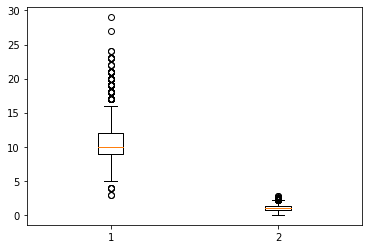

In [83]:
# determine the presence of outlying values using box plots and histograms
plt.boxplot(X_train[['rings', 'total_weight']])

In the boxplots above, we see that rings has a few outliers, whereas weight has very little range

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'total_weight'}>]], dtype=object)

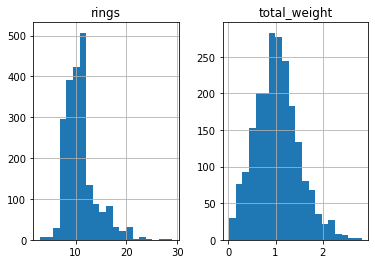

In [84]:
X_train[['rings', 'total_weight']].hist(bins=20)

In the histograms above, we see that there is a slight right skew in the weight of each abalone, but the data is close to Gaussian/normally distributed.  Rings, however, is right skewed.

In [16]:
# join the input training and output training columns together for the scatter matrix
abalone_training = X_train.join(y_train)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='total_weight', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='total_weight'>,
        <AxesSubplot:xlabel='total_weight', ylabel='total_weight'>]],
      dtype=object)

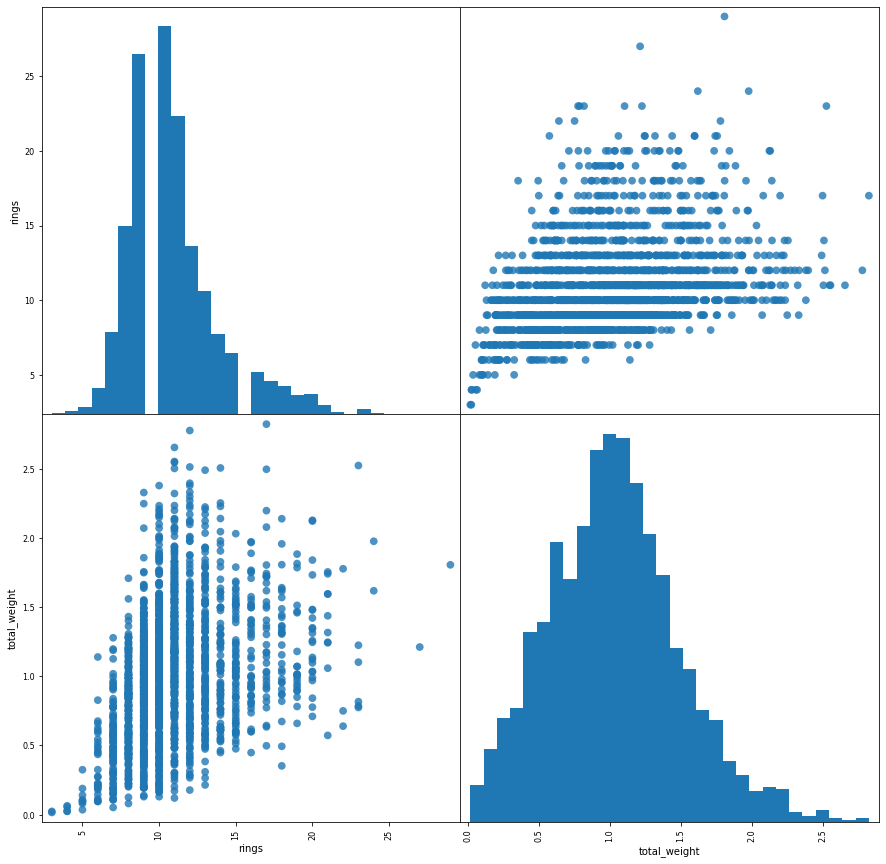

In [86]:
pd.plotting.scatter_matrix(X_train[['rings', 'total_weight']], figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

<h1>Data transformation</h1>

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'total_weight'}>]], dtype=object)

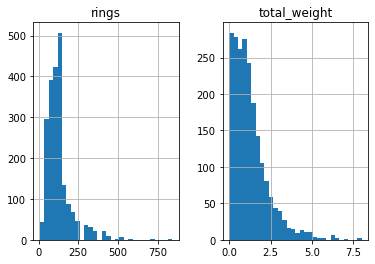

In [88]:
# squaring
abalone_sq = X_train[['rings', 'total_weight']]**2
abalone_sq.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='total_weight', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='total_weight'>,
        <AxesSubplot:xlabel='total_weight', ylabel='total_weight'>]],
      dtype=object)

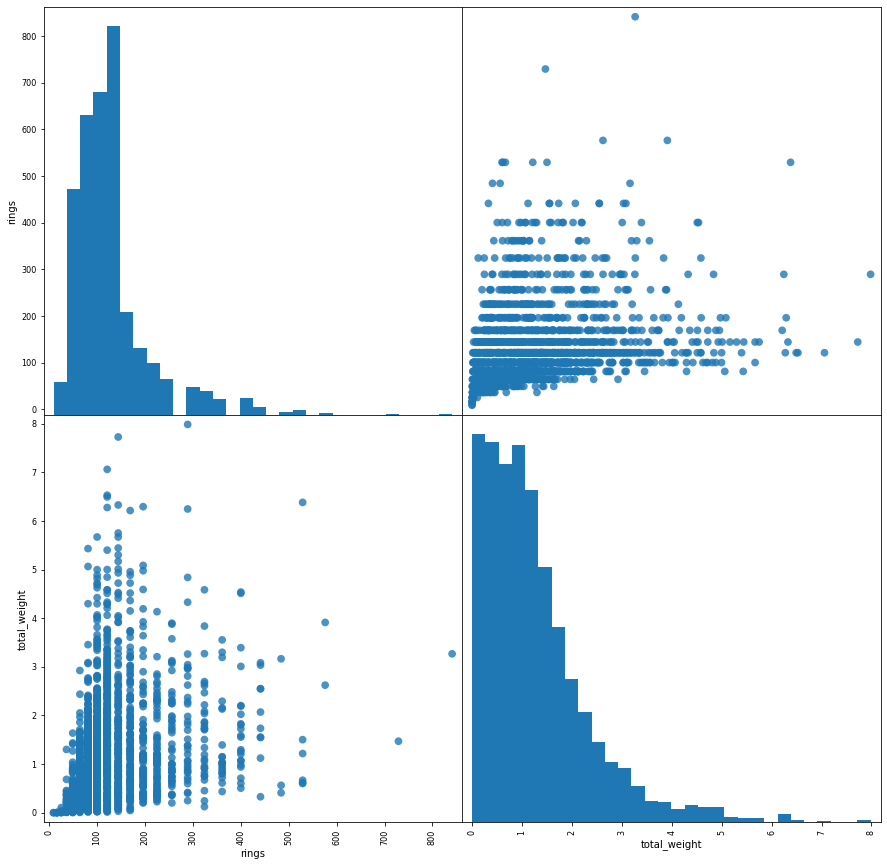

In [89]:
# abalone_sq scatter matrix
pd.plotting.scatter_matrix(abalone_sq, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'total_weight'}>]], dtype=object)

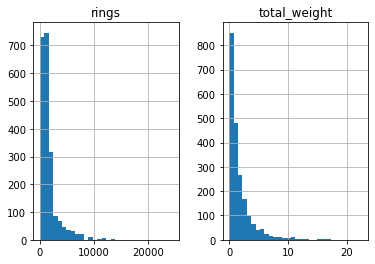

In [90]:
# cubing
abalone_cube = X_train[['rings', 'total_weight']]**3
abalone_cube.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='total_weight', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='total_weight'>,
        <AxesSubplot:xlabel='total_weight', ylabel='total_weight'>]],
      dtype=object)

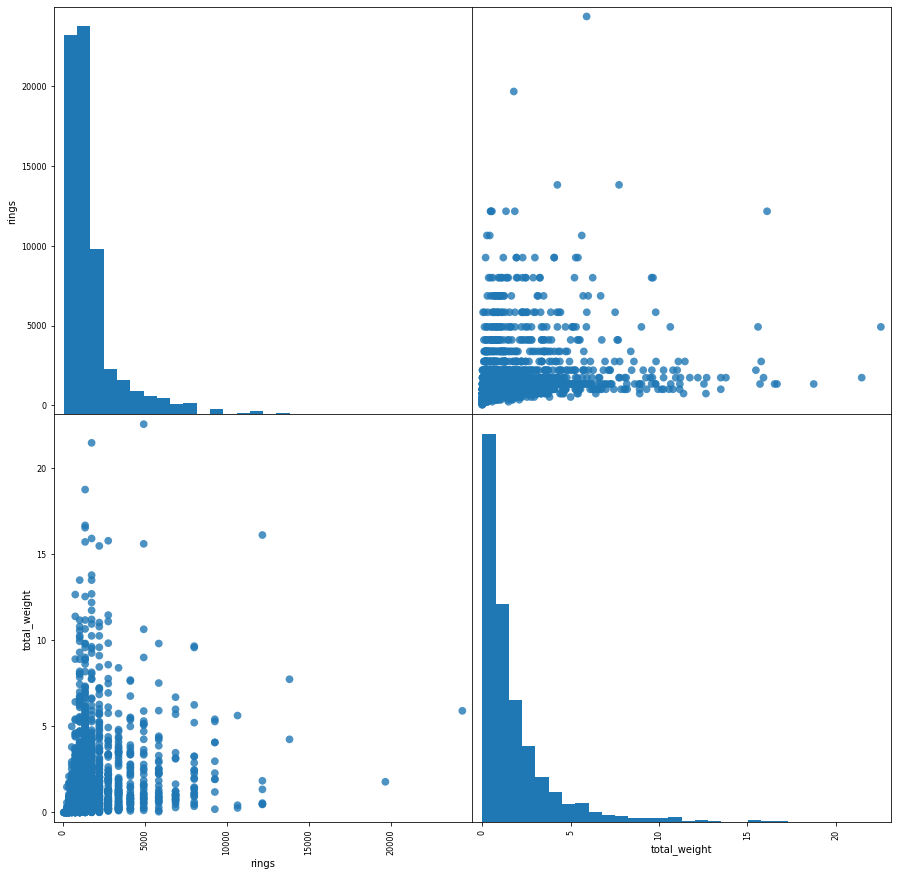

In [91]:
pd.plotting.scatter_matrix(abalone_cube, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'total_weight'}>]], dtype=object)

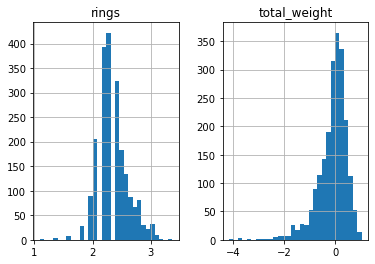

In [92]:
# log
abalone_log = np.log(X_train[['rings', 'total_weight']])
abalone_log.hist(bins=30)

array([[<AxesSubplot:xlabel='total_weight', ylabel='total_weight'>,
        <AxesSubplot:xlabel='shell_length', ylabel='total_weight'>],
       [<AxesSubplot:xlabel='total_weight', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

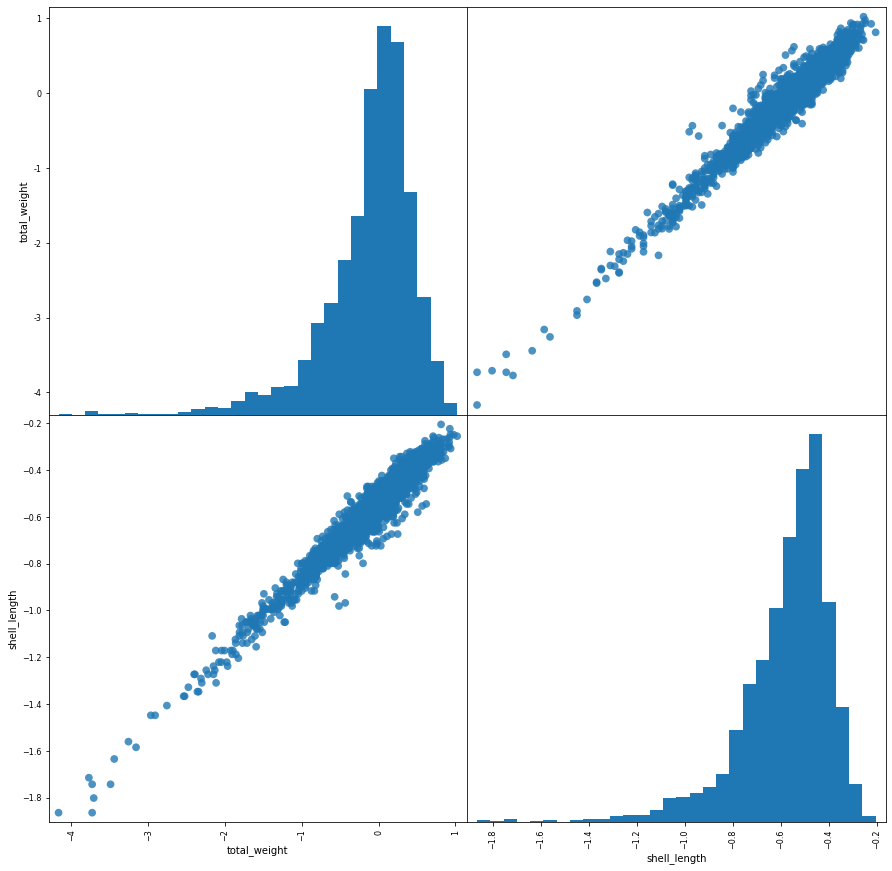

In [27]:
pd.plotting.scatter_matrix(abalone_log, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'total_weight'}>]], dtype=object)

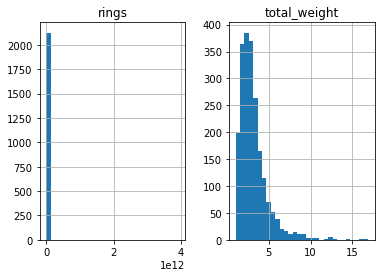

In [134]:
# exp
abalone_exp = np.exp(X_train[['rings', 'total_weight']])
abalone_exp.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='total_weight', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='total_weight'>,
        <AxesSubplot:xlabel='total_weight', ylabel='total_weight'>]],
      dtype=object)

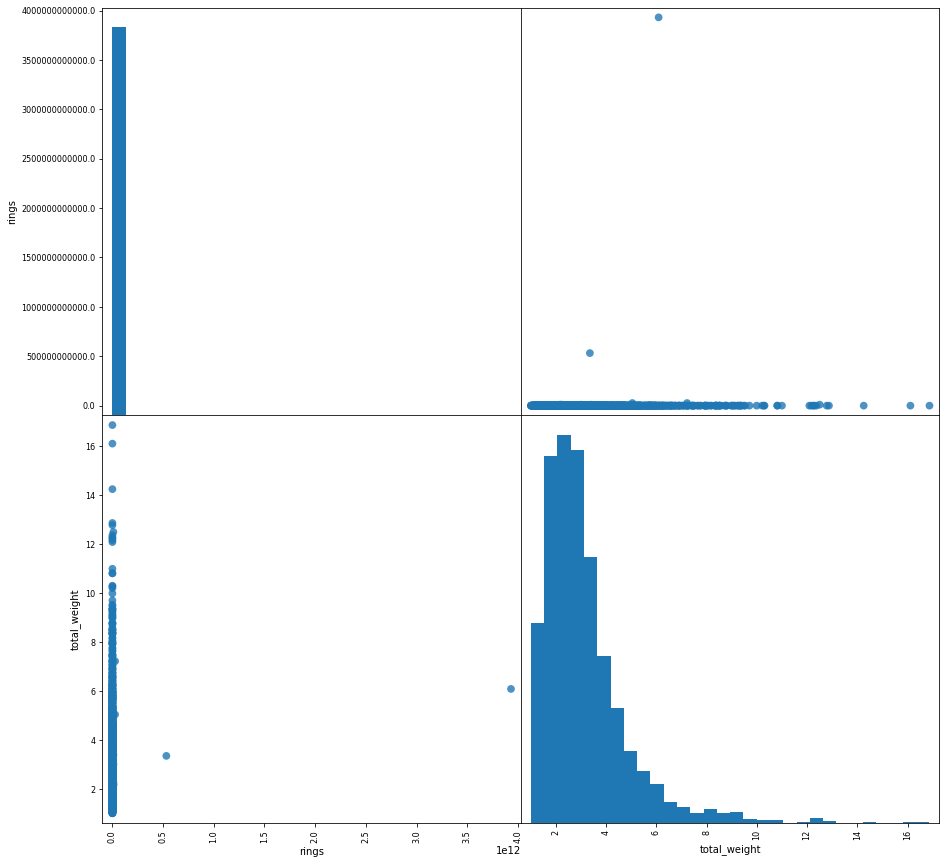

In [135]:
pd.plotting.scatter_matrix(abalone_exp, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

<h1>Part 2: KNN</h1>

Because the target variable is a continuous data type, regression using linear models is the most obvious choice to turn to when performing initial machine learning on the data set.

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

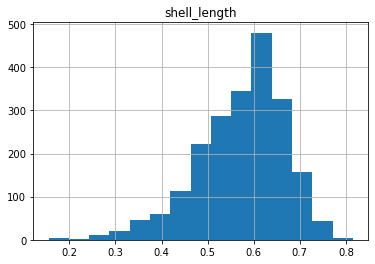

In [108]:
# view the distribution of the target training data
y_train.hist(bins = 15)

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

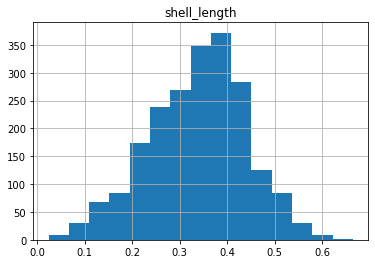

In [109]:
(y_train**2).hist(bins=15)

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

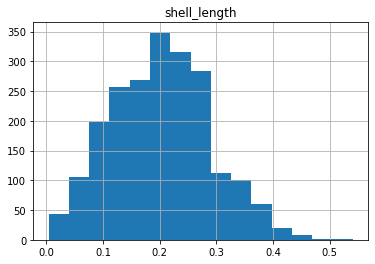

In [110]:
(y_train**3).hist(bins=15)

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

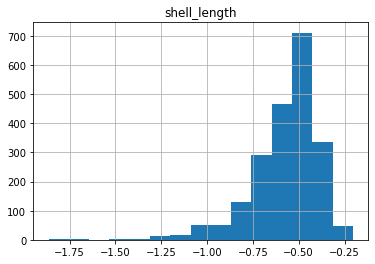

In [111]:
np.log(y_train).hist(bins=15)

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

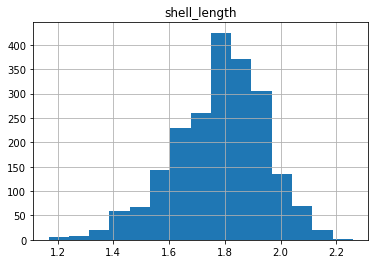

In [112]:
np.exp(y_train).hist(bins=15)

In [113]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [139]:
reg.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = reg.predict(X_test)

In [141]:
print(reg.score(X_test, y_test))

0.8460379909034604

In [147]:
from sklearn.metrics import mean_squared_error
# root mean square error
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8460379909034604
Root Mean Squared Error: 0.03815167837967855


Although the R-squared and the RMSE indicate that the model is fairly good, cross-validation would need to be performed to test the model's ability to generalize on different sets of data.

In [148]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
cv_test = cross_val_score(reg, X_test, y_test, cv=10)

In [155]:
print(cv_test)
print("10-fold cv average score: {}".format(round(np.mean(cv_test),2)))
print("10-fold cv median score: {}".format(round(np.median(cv_test),2)))


[0.82731244 0.8892486  0.85352246 0.81012968 0.84449215 0.86454201
 0.85347897 0.81780706 0.88703843 0.83133876]
10-fold cv average score: 0.85
10-fold cv median score: 0.85


In addition to k-fold cross validation, regularized regression will also be conducted.  Hyperparameter tuning will have to occur here due to the alpha value needing to be fine-tuned to avoid both overfitting and underfitting.

In [156]:
from sklearn.linear_model import Ridge
# adjust the alpha
# setting normalize to True ensures that all the variables are on the same scale
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8267842555004195

In [159]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_
print(lasso_coef)

[ 0.  0. -0.  0.]


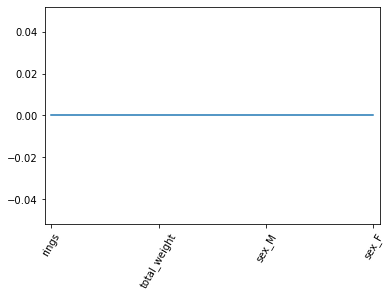

In [160]:
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
